## Did the financial crisis of 2008 have an impact on the number of households composed by single parent or two parents and did this have an impact on the educational attainment of the children brought up in these housholds?

In [2]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
import geopandas as gpd

In [3]:
data_url_1 = "https://datacenter.kidscount.org/rawdata.axd?ind=105&loc=1"

data_url_2 = "https://datacenter.kidscount.org/rawdata.axd?ind=111&loc=1"

data_url_3 = "https://datacenter.kidscount.org/rawdata.axd?ind=6294&loc=1"

In [4]:
# Importing the data

# Data containing the household structure of various states in the US over several years
child_pop_household_type = pd.read_excel(data_url_1)
child_neither_parent = pd.read_excel(data_url_2)

# Data containing the education statistics of adults between 25 and 34 in various states in the US over different years 
edu_pop_25_to_34 = pd.read_excel(data_url_3)

In [5]:
child_pop_household_type.head()

,LocationType,Location,Household Type,TimeFrame,DataFormat,Data
0,State,California,Married-couple Households,2000,Number,6433000
1,State,California,Father only Households,2000,Number,627000
2,State,California,Mother only Households,2000,Number,2037000
3,Nation,United States,Married-couple Households,2000,Number,49775000
4,Nation,United States,Father only Households,2000,Number,4457000


In [6]:
# Cleaning the child_pop_household_type data

# making location the index 
child_pop_household_type_1 = child_pop_household_type.set_index(['Location'])

# dropping the fields with United States with them
child_pop_household_type_1 = child_pop_household_type_1.drop(['United States'])

# dropping N.A
child_pop_household_type_1 = child_pop_household_type_1[child_pop_household_type_1.Data != 'N.A.']

# dropping the fields with Number in them 
child_pop_household_type_1 = child_pop_household_type_1[child_pop_household_type_1.DataFormat != 'Number']

# dropping the DataFormat field
child_pop_household_type_1 = child_pop_household_type_1.drop(['DataFormat'], axis = 1)

# dropping the LocationType field
child_pop_household_type_1 = child_pop_household_type_1.drop(['LocationType'], axis = 1)

In [8]:
# Cleaning the child_neither_parent data using the same process as that of child_pop_household_type data 

child_neither_parent_1 = child_neither_parent.set_index(['Location'])
child_neither_parent_1 = child_neither_parent_1.drop(['United States'])
child_neither_parent_1 = child_neither_parent_1[child_neither_parent_1.Data != 'N.A.']
child_neither_parent_1 = child_neither_parent_1[child_neither_parent_1.DataFormat != 'Number']
child_neither_parent_1 = child_neither_parent_1.drop(['DataFormat'], axis = 1)
child_neither_parent_1 = child_neither_parent_1.drop(['LocationType'], axis = 1)

In [9]:
child_neither_parent_1.shape

(931, 2)

In [10]:
#Creating a list for the child_neither_parent data 
Household_Type = []
for i in range(931):
    Household_Type.append('Neither parent Households')

#Adding the Household_Type list to the child_neither_parent_new data
child_neither_parent_1['Household Type'] = Household_Type

##Changing the order of columns 
child_neither_parent_1 = child_neither_parent_1[['Household Type','TimeFrame', 'Data']]

In [11]:
## Combining the child_pop_household_type and child_neither_parent_new datasets together 
Household_structure = child_pop_household_type_1.append(child_neither_parent_1)

## Reseting the index
Household_structure = Household_structure.reset_index()

## Changing the string type to float type 
Household_structure['Data'] = pd.to_numeric(Household_structure['Data'], errors = 'coerce')

In [12]:
Household_structure.head(15)

,Location,Household Type,TimeFrame,Data
0,Wyoming,Married-couple Households,2000,0.75
1,Wyoming,Father only Households,2000,0.10
2,Wyoming,Mother only Households,2000,0.14
3,West Virginia,Married-couple Households,2000,0.72
4,West Virginia,Father only Households,2000,0.04
5,West Virginia,Mother only Households,2000,0.23
6,Wisconsin,Married-couple Households,2000,0.73
7,Wisconsin,Father only Households,2000,0.06
8,Wisconsin,Mother only Households,2000,0.19
9,Montana,Married-couple Households,2000,0.77


In [13]:
## Cleaning the edu_pop_25_to_34_new
edu_pop_25_to_34_1 = edu_pop_25_to_34.set_index(['Location'])
edu_pop_25_to_34_1 = edu_pop_25_to_34_1.drop(['United States'])
edu_pop_25_to_34_1 = edu_pop_25_to_34_1[edu_pop_25_to_34_1.DataFormat != 'Number']
edu_pop_25_to_34_1 = edu_pop_25_to_34_1.drop(['DataFormat'], axis = 1)
edu_pop_25_to_34_1 = edu_pop_25_to_34_1.drop(['LocationType'], axis = 1)
edu_pop_25_to_34_1 = edu_pop_25_to_34_1.reset_index()

In [14]:
edu_pop_25_to_34_1.head(15)

,Location,Education,TimeFrame,Data
0,Alabama,Not a high school graduate,2000,0.17
1,Alabama,High school diploma or GED,2000,0.52
2,Alabama,Associate's Degree,2000,0.08
3,Alabama,Bachelor's Degree,2000,0.18
4,Alabama,Graduate degree,2000,0.05
5,Alabama,Not a high school graduate,2001,0.14
6,Alabama,High school diploma or GED,2001,0.56
7,Alabama,Associate's Degree,2001,0.08
8,Alabama,Bachelor's Degree,2001,0.17
9,Alabama,Graduate degree,2001,0.05


In [15]:
## grouping the edu_pop_25_to_34_new data by the education type for all the years from 2000 to 2017 and 
## then taking the average percentage of education level in different states over the years. 

# grouping the edu_pop_25_to_34_new data by not a high school graduate education level and taking the average
no_highschool_avg = edu_pop_25_to_34_1.loc[(edu_pop_25_to_34_1['Education'].str.contains('Not a high school graduate'))]
no_highschool_avg = no_highschool_avg.groupby('Location').agg({'TimeFrame':np.mean, 'Data':np.mean})

# repeating the grouping part for other education levels 
high_school_avg = edu_pop_25_to_34_1.loc[(edu_pop_25_to_34_1['Education'].str.contains('High school diploma or GED'))]
high_school_avg = high_school_avg.groupby('Location').agg({'TimeFrame':np.mean, 'Data':np.mean})

associate_avg = edu_pop_25_to_34_1.loc[(edu_pop_25_to_34_1['Education'].str.contains("Associate's Degree"))]
associate_avg = associate_avg.groupby('Location').agg({'TimeFrame':np.mean, 'Data':np.mean})

bachelor_avg = edu_pop_25_to_34_1.loc[(edu_pop_25_to_34_1['Education'].str.contains("Bachelor's Degree"))]
bachelor_avg = bachelor_avg.groupby('Location').agg({'TimeFrame':np.mean, 'Data':np.mean})

grad_avg = edu_pop_25_to_34_1.loc[(edu_pop_25_to_34_1['Education'].str.contains('Graduate degree'))]
grad_avg = grad_avg.groupby('Location').agg({'TimeFrame':np.mean, 'Data':np.mean})

In [16]:
## sorting the data from highest to lowest and finding the state with the highest and the lowest percentage of 
## adults who are not high school graduates 
no_highschool_avg = no_highschool_avg.sort_values('Data', ascending = False)
print(no_highschool_avg.head(1)) ## gives us Texas
print(no_highschool_avg.tail(1)) ## gives us North Dakota

## repeating the sorting part for other education levels 
high_school_avg = high_school_avg.sort_values('Data', ascending = False)
print(high_school_avg.head(1)) ## gives us Alaska
print(high_school_avg.tail(1)) ## gives us District of Columbia 

associate_avg = associate_avg.sort_values('Data', ascending = False)
print(associate_avg.head(1)) ## gives us North Dakota 
print(associate_avg.tail(1)) ## gives us District of Columbia 

bachelor_avg = bachelor_avg.sort_values('Data', ascending = False)
print(bachelor_avg.head(1)) ## gives us District of Columbia 
print(bachelor_avg.tail(1)) ## gives us New Mexico

grad_avg = grad_avg.sort_values('Data', ascending = False)
print(grad_avg.head(1)) ## gives us District of Columbia 
print(grad_avg.tail(1)) ## gives us Nevada

          TimeFrame      Data
Location                     
Texas        2008.5  0.178333
              TimeFrame      Data
Location                         
North Dakota     2008.5  0.043889
          TimeFrame      Data
Location                     
Alaska       2008.5  0.603889
                      TimeFrame      Data
Location                                 
District of Columbia     2008.5  0.258889
              TimeFrame      Data
Location                         
North Dakota     2008.5  0.148889
                      TimeFrame      Data
Location                                 
District of Columbia     2008.5  0.024444
                      TimeFrame      Data
Location                                 
District of Columbia     2008.5  0.328889
            TimeFrame      Data
Location                       
New Mexico     2008.5  0.151111
                      TimeFrame      Data
Location                                 
District of Columbia     2008.5  0.304444
          TimeFr

In [17]:
## Showing the states with the highest and the lowest percentage of different education levels

select_state_degree = pd.DataFrame({ "Education Level": ["No_highschool", "High_school_diploma_or_GED","Associates", "Bachelors", "Graduate"],
                            "Highest_percentage_state": ['Texas', 'Alaska', 'North Dakota', 'District of Columbia', 'District of Columbia'], 
                            "Lowest_percentage_state": ['North Dakota', "District of Columbia", "District of Columbia", "New Mexico", "Nevada"]})
select_state_degree

,Education Level,Highest_percentage_state,Lowest_percentage_state
0,No_highschool,Texas,North Dakota
1,High_school_diploma_or_GED,Alaska,District of Columbia
2,Associates,North Dakota,District of Columbia
3,Bachelors,District of Columbia,New Mexico
4,Graduate,District of Columbia,Nevada


In [18]:
## Selecting the states of Alaska, New York, Nevada, New Mexico, North Dakota and Texas 
## and finding out the average household structure of those states over the years  

Alaska_edu = Household_structure.loc[(Household_structure['Location'].str.contains('Alaska'))]
Alaska_edu = Alaska_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})

New_York_edu = Household_structure.loc[(Household_structure['Location'].str.contains('New York'))]
New_York_edu = New_York_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})

New_Mexico_edu = Household_structure.loc[(Household_structure['Location'].str.contains('New Mexico'))]
New_Mexico_edu = New_Mexico_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})

Nevada_edu = Household_structure.loc[(Household_structure['Location'].str.contains('Nevada'))]
Nevada_edu = Nevada_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})

North_Dakota_edu = Household_structure.loc[(Household_structure['Location'].str.contains('North Dakota'))]
North_Dakota_edu = North_Dakota_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})

Texas_edu = Household_structure.loc[(Household_structure['Location'].str.contains('Texas'))]
Texas_edu = Texas_edu.groupby('Household Type').agg({'TimeFrame':np.mean, 'Data':np.mean})

In [19]:
## Showing the household structure of the different states 

# Merging the state_edu datasets for different states to be combined 
merge1 = pd.merge(Alaska_edu, New_York_edu, on ='Household Type', how = 'inner')
merge2 = pd.merge(New_Mexico_edu, Nevada_edu,on ='Household Type', how = 'inner' )
merge3 = pd.merge(North_Dakota_edu, Texas_edu,on ='Household Type', how = 'inner') 
merge4 = pd.merge(merge1,merge2, on ='Household Type', how = 'inner')
select_state_household = pd.merge(merge4,merge3, on ='Household Type', how = 'inner')

# Cleaning the select_state_household dataset
select_state_household = select_state_household.drop(columns = ['TimeFrame_x_x', 'TimeFrame_y_x', 'TimeFrame_x_y', 'TimeFrame_y_y', 'TimeFrame_x', 'TimeFrame_y'], axis = 1)
select_state_household = select_state_household.rename(index = str, columns = {"Data_x_x": "Alaska", "Data_y_x": "New York", "Data_x_y": "New Mexico", "Data_y_y": "Nevada", "Data_x": "North Dakota", "Data_y": "Texas" })
select_state_household = select_state_household.transpose()

In [20]:
select_state_household

Household Type,Father only Households,Married-couple Households,Mother only Households,Neither parent Households
Alaska,0.091667,0.692222,0.206111,0.058889
New York,0.068333,0.650556,0.276111,0.050000
New Mexico,0.093889,0.615556,0.285556,0.063333
Nevada,0.091111,0.655000,0.244444,0.058333
North Dakota,0.069444,0.742778,0.178333,0.041111
Texas,0.062778,0.678333,0.251111,0.055556


In [21]:
#Randomly chose two states
## Making a dataset for New York and North Dakota to understand the household structure trends in the two states

# Dataset for New York 
New_York_household = Household_structure.loc[Household_structure['Location'].str.contains('New York')]

# dropping location and making a pivot table 
New_York_household = New_York_household.drop(['Location'], axis = 1)
New_York_household = New_York_household.pivot_table(index = 'TimeFrame', columns = 'Household Type')

# removing the data field on the top
New_York_household.columns = New_York_household.columns.droplevel(0)
New_York_household = New_York_household.reset_index().rename_axis(None, axis = 1)

# renaming the columns 
New_York_household.columns = New_York_household.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("-","_")

#assigning the year as index 
New_York_household = New_York_household.set_index(['timeframe'])

# Repeating the process for North Dakota 
North_Dakota_household = Household_structure.loc[Household_structure['Location'].str.contains('North Dakota')]
North_Dakota_household = North_Dakota_household.drop(['Location'], axis = 1)
North_Dakota_household = North_Dakota_household.pivot_table(index = 'TimeFrame', columns = 'Household Type')
North_Dakota_household.columns = North_Dakota_household.columns.droplevel(0)
North_Dakota_household = North_Dakota_household.reset_index().rename_axis(None, axis = 1)
North_Dakota_household.columns = North_Dakota_household.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("-","_")
North_Dakota_household = North_Dakota_household.set_index(['timeframe'])

In [25]:
## Making a dataset for New York and North Dakota to understand the education level trends in the two states 

## Making a dataset for New York and cleaning it 
New_York_education = edu_pop_25_to_34_1.loc[edu_pop_25_to_34_1['Location'].str.contains('New York')]

# dropping location and making a pivot table 
New_York_education = New_York_education.drop(['Location'], axis = 1)
New_York_education = New_York_education.pivot_table(index = 'TimeFrame', columns = 'Education')

# reseting the index 
New_York_education.columns = New_York_education.columns.droplevel(0)
New_York_education = New_York_education.reset_index().rename_axis(None, axis = 1)

# renaming the columns 
New_York_education.columns = New_York_education.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("-","_").str.replace("'", "")

# reseting the index 
New_York_education = New_York_education.set_index(['timeframe'])

# Repeating the process for North Dakota
North_Dakota_education = edu_pop_25_to_34_1.loc[edu_pop_25_to_34_1['Location'].str.contains('North Dakota')]
North_Dakota_education = North_Dakota_education.drop(['Location'], axis = 1)
North_Dakota_education = North_Dakota_education.pivot_table(index = 'TimeFrame', columns = 'Education')
North_Dakota_education.columns = North_Dakota_education.columns.droplevel(0)
North_Dakota_education = North_Dakota_education.reset_index().rename_axis(None, axis = 1)
North_Dakota_education.columns = North_Dakota_education.columns.str.strip().str.lower().str.replace(' ', '_').str.replace("-","_").str.replace("'", "")
North_Dakota_education = North_Dakota_education.set_index(['timeframe'])

In [26]:
North_Dakota_education

,associates_degree,bachelors_degree,graduate_degree,high_school_diploma_or_ged,not_a_high_school_graduate
timeframe,,,,,
2000,0.15,0.27,0.04,0.51,0.04
2001,0.15,0.25,0.06,0.49,0.04
2002,0.13,0.26,0.04,0.52,0.05
2003,0.12,0.28,0.05,0.52,0.03
2004,0.13,0.26,0.06,0.51,0.04
2005,0.16,0.26,0.06,0.47,0.05
2006,0.14,0.27,0.06,0.49,0.04
2007,0.16,0.28,0.06,0.46,0.04
2008,0.15,0.28,0.06,0.46,0.04


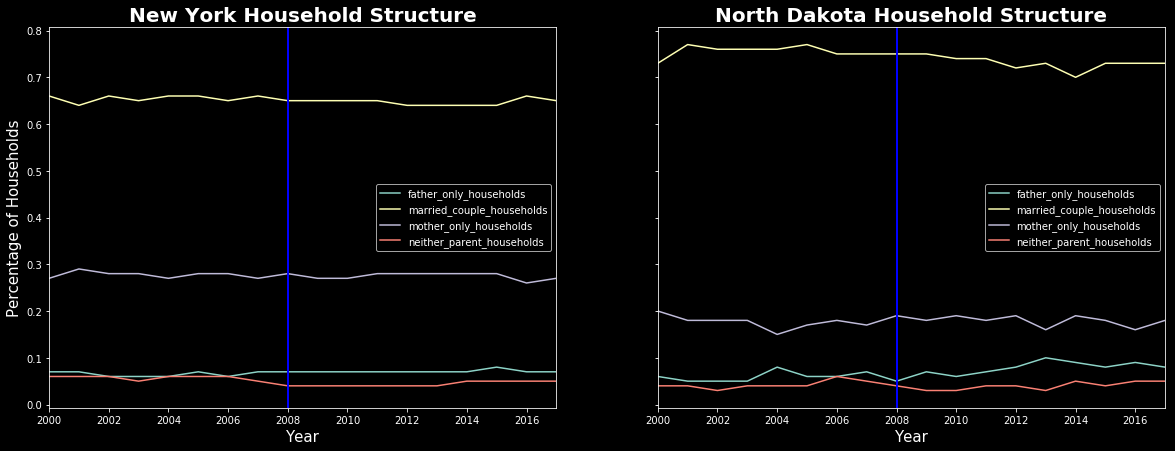

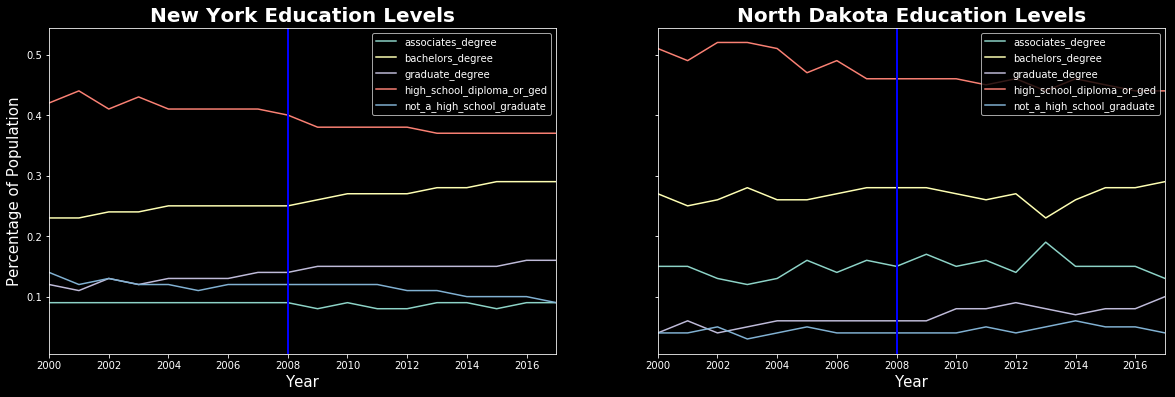

In [34]:
plt.style.use('dark_background')
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)

New_York_household.plot(ax = ax, figsize = (20,7))
ax.set_xlim(2000,2017)
ax.set_title('New York Household Structure', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Percentage of Households', fontsize = 15)

ax.axvline(x = 2008, color='b',linewidth=2) 
message = 'Financial Crisis'

North_Dakota_household.plot(ax = ax2, figsize = (20,7))
ax2.set_xlim(2000,2017)
ax2.set_title('North Dakota Household Structure', fontsize = 20, fontweight = 'bold' )
ax2.set_xlabel('Year', fontsize = 15)
ax2.set_ylabel('Percentage of Households', fontsize = 15)

ax2.axvline(x = 2008, color='b',linewidth=2) 
message = 'Financial Crisis'

plt.style.use('dark_background')
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)

New_York_education.plot(ax = ax, figsize = (20,6))
ax.set_xlim(2000,2017)
ax.set_title('New York Education Levels', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Percentage of Population', fontsize = 15)

ax.axvline(x = 2008, color='b',linewidth=2) 
message = 'Financial Crisis'

North_Dakota_education.plot(ax = ax2, figsize = (20,6))
ax2.set_xlim(2000,2017)
ax2.set_title('North Dakota Education Levels', fontsize = 20, fontweight = 'bold')
ax2.set_xlabel('Year', fontsize = 15)
ax2.set_ylabel('Percentage of Population', fontsize = 15)

ax2.axvline(x = 2008, color='b',linewidth=2) 
message = 'Financial Crisis'


As the graphs show, the financial crisis had no effect on the household structure of educational attainment of the children in New York or North Dakota.